<a href="https://colab.research.google.com/github/jooyeongkang/kaggle-chest-x-ray-images-pneumonia/blob/minor-update/ChestXRay_Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install & Import libraries

In [1]:
! pip install --upgrade pip &> /dev/null
! pip install tensorflow &> /dev/null
! pip install -q kaggle &> /dev/null

In [2]:
from google.colab import drive
drive.mount('/gdrive')

##from google.colab import files
#uploaded = files.upload()

Mounted at /gdrive


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Load data

## Jooyeong's Path

In [4]:
# Train Data
dir_dt_train = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/train'
dir_dt_train = pathlib.Path(dir_dt_train)

# Validation Data(merged to the train data due to the small amount of validation data)
#dir_dt_val = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/val'
#dir_dt_val = pathlib.Path(dir_dt_val)

# Test Data
dir_dt_test = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/test'
dir_dt_test = pathlib.Path(dir_dt_test)

## Jin's Path

In [ ]:
# Train Data _Jin's data
dir_dt_train = '/gdrive/MyDrive/CXR/chest_xray/chest_xray/train'
dir_dt_train = pathlib.Path(dir_dt_train)
# Validation Data(merged to the train data due to the small amount of validation data)
#dir_dt_val = '/gdrive/MyDrive/CXR/chest_xray/chest_xray/val'
#dir_dt_val = pathlib.Path(dir_dt_val)

# Test Data
dir_dt_test = '/gdrive/MyDrive/CXR/chest_xray/chest_xray/test'
dir_dt_test = pathlib.Path(dir_dt_test)

In [ ]:
"""# Train Data
dir_dt_train_pneumonia = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/train/PNEUMONIA'
dir_dt_train_normal = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/train/NORMAL'
dir_dt_train_pneumonia = pathlib.Path(dir_dt_train_pneumonia)
dir_dt_train_normal = pathlib.Path(dir_dt_train_normal)

dt_train_pneumonia = list(dir_dt_train_pneumonia.glob('*.jpeg'))
dt_train_normal = list(dir_dt_train_normal.glob('*.jpeg'))

img_cnt_train_pneumonia = len(dt_train_pneumonia)
img_cnt_train_normal = len(dt_train_normal)

print('Training Data')
print('Pneumonia: {} Normal: {}'.format(len(dt_train_pneumonia), len(dt_train_normal)))


# Validation Data
dir_dt_val_pneumonia = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/val/PNEUMONIA'
dir_dt_val_normal = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/val/NORMAL'
dir_dt_val_pneumonia = pathlib.Path(dir_dt_val_pneumonia)
dir_dt_val_normal = pathlib.Path(dir_dt_val_normal)

dt_val_pneumonia = list(dir_dt_val_pneumonia.glob('*.jpeg'))
dt_val_normal = list(dir_dt_val_normal.glob('*.jpeg'))

img_cnt_val_pneumonia = len(dt_val_pneumonia)
img_cnt_val_normal = len(dt_val_normal)

print('Validation Data')
print('Pneumonia: {} Normal: {}'.format(len(dt_val_pneumonia), len(dt_val_normal)))


# Test Data
dir_dt_test_pneumonia = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/test/PNEUMONIA'
dir_dt_test_normal = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/test/NORMAL'
dir_dt_test_pneumonia = pathlib.Path(dir_dt_test_pneumonia)
dir_dt_test_normal = pathlib.Path(dir_dt_test_normal)

dt_test_pneumonia = list(dir_dt_test_pneumonia.glob('*.jpeg'))
dt_test_normal = list(dir_dt_test_normal.glob('*.jpeg'))

img_cnt_test_pneumonia = len(dt_test_pneumonia)
img_cnt_test_normal = len(dt_test_normal)

print('Test Data')
print('Pneumonia: {} Normal: {}'.format(len(dt_test_pneumonia), len(dt_test_normal)))"""

"# Train Data\ndir_dt_train_pneumonia = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/train/PNEUMONIA'\ndir_dt_train_normal = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/train/NORMAL'\ndir_dt_train_pneumonia = pathlib.Path(dir_dt_train_pneumonia)\ndir_dt_train_normal = pathlib.Path(dir_dt_train_normal)\n\ndt_train_pneumonia = list(dir_dt_train_pneumonia.glob('*.jpeg'))\ndt_train_normal = list(dir_dt_train_normal.glob('*.jpeg'))\n\nimg_cnt_train_pneumonia = len(dt_train_pneumonia)\nimg_cnt_train_normal = len(dt_train_normal)\n\nprint('Training Data')\nprint('Pneumonia: {} Normal: {}'.format(len(dt_train_pneumonia), len(dt_train_normal)))\n\n\n# Validation Data\ndir_dt_val_pneumonia = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/val/PNEUMONIA'\ndir_dt_val_normal = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/val/NORMAL'\ndir_dt_val_pneumonia = pathlib.Path(dir_dt_val_pneumonia)\ndir_dt_val_normal = pathlib.Path(dir_dt_val_normal)\n\ndt_val_pneumonia = list(dir_dt_val_

# Create a dataset

## Define parameters

In [5]:
batch_size = 32   # Number of Images in each batch
img_height = 180  # Size of Height for Resizing
img_width = 180   # Size of Width for Resizing

## Data Preprocessing

### Reference
**tf.keras.preprocessing.image_dataset_from_directory**
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

In [6]:
dt_train = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dir_dt_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='grayscale', # Option: rgb
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=.2,
    subset='training'
)

Found 5232 files belonging to 2 classes.
Using 4186 files for training.


In [7]:
dt_val = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dir_dt_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='grayscale', # Option: rgb
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=.2,
    subset='validation'
  )

Found 5232 files belonging to 2 classes.
Using 1046 files for validation.


In [8]:
num_class = len(dt_train.class_names)

# Visualize the data

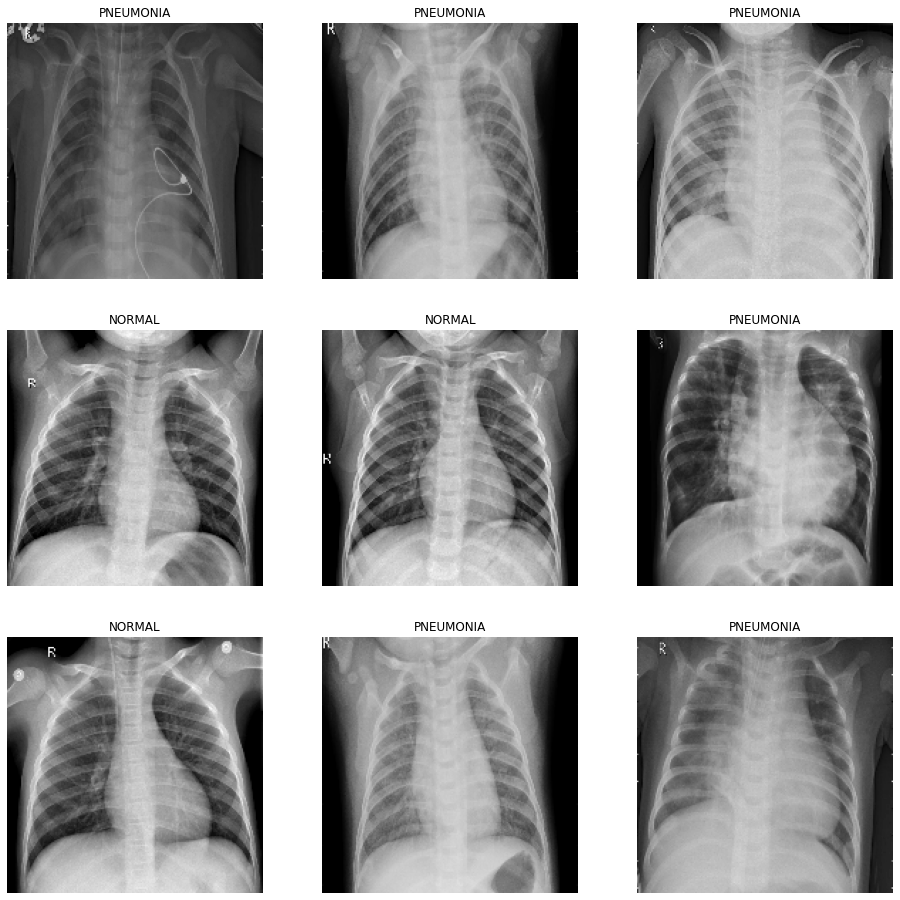

In [9]:
plt.figure(figsize=(16, 16))

for images, labels in dt_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(tf.squeeze(images[i].numpy().astype("uint8")), cmap='gray', vmin=0, vmax=255)
    plt.title(dt_train.class_names[labels[i]])
    plt.axis("off")

## Check Data Structure

### Reference
**tf.data.Dataset**

https://www.tensorflow.org/api_docs/python/tf/data/Dataset

In [ ]:
for image_batch, labels_batch in dt_train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 1)
(32,)


# Configure the dataset for the better performance

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

dt_train = dt_train.cache().prefetch(buffer_size=AUTOTUNE)
dt_val = dt_val.cache().prefetch(buffer_size=AUTOTUNE)


'''
Color RGB ranges from 0 to 255. For the better fit to a neural network,
standardize the range from 0 to 1.
'''
"""# Before normalizing layer
image_batch, labels_batch = next(iter(dt_train))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

normalized_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255) 
normalized_dt = dt_train.map(lambda x, y: (normalized_layer(x), y))

# After nomarlizing layer
image_batch, labels_batch = next(iter(normalized_dt))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))"""

'# Before normalizing layer\nimage_batch, labels_batch = next(iter(dt_train))\nfirst_image = image_batch[0]\nprint(np.min(first_image), np.max(first_image))\n\nnormalized_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255) \nnormalized_dt = dt_train.map(lambda x, y: (normalized_layer(x), y))\n\n# After nomarlizing layer\nimage_batch, labels_batch = next(iter(normalized_dt))\nfirst_image = image_batch[0]\nprint(np.min(first_image), np.max(first_image))'

# Experimental Designs

In [30]:
def build_model(dt_train, dt_augms):
  model = Sequential()
    # It is also possible to normalize layer in the building block of the model                   
    #layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    # The first convolutional layer can typically have a large kernel, usually with a stride of 2
    #layers.Conv2D(filters=16, kernel_size=5, strides=(2,), padding='same', activation='relu', input_shape=(img_height, img_width, 3)), # RGB
    
  if 'randomflip' in dt_augms:
    model.add(layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 1)))
  elif 'randomrotation' in dt_augms:
    model.add(layers.experimental.preprocessing.RandomRotation(0.1, input_shape=(img_height, img_width, 1)))
  elif 'randomzoom' in dt_augms:
    model.add(layers.experimental.preprocessing.RandomZoom(0.1, input_shape=(img_height, img_width, 1)))
  elif 'randomflip' and 'randomrotation' in dt_augms:
    model.add(layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 1)))
    model.add(layers.experimental.preprocessing.RandomRotation(0.1, input_shape=(img_height, img_width, 1)))
  elif 'randomflip' and 'randomzoom' in dt_augms:
    model.add(layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 1)))
    model.add(layers.experimental.preprocessing.RandomZoom(0.1, input_shape=(img_height, img_width, 1)))
  elif 'randomrotation' and 'randomzoom' in dt_augms:
    model.add(layers.experimental.preprocessing.RandomRotation(0.1, input_shape=(img_height, img_width, 1)))
    model.add(layers.experimental.preprocessing.RandomZoom(0.1, input_shape=(img_height, img_width, 1)))
  elif 'randomflip' and 'randomrotation' and 'randomzoom' in dt_augms:
    model.add(layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 1)))
    model.add(layers.experimental.preprocessing.RandomRotation(0.1, input_shape=(img_height, img_width, 1)))
    model.add(layers.experimental.preprocessing.RandomZoom(0.1, input_shape=(img_height, img_width, 1)))
       
  model.add(layers.Conv2D(filters=16, kernel_size=5, strides=2, padding='same', activation='relu'))
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPooling2D())
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  #layers.Dropout(.5), # To reduce overfitting
  model.add(layers.Dense(64, activation='relu'))
  #layers.Dropout(.5),
  model.add(layers.Dense(num_class, activation='softmax'))

  # Compile the model
  model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
  
  return model

In [15]:
dt_augms = ['randomflip', 'randomrotation', 'randomzoom']

## 1. Apply one augmentation:

1.   Random Flip
2.   Random Rotation
3.   Random Zoom

### 1-1 Random Flip

In [ ]:
def build_model(dt_train): # with no drop out


  model = Sequential([
    # It is also possible to normalize layer in the building block of the model                   
    #layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # The first convolutional layer can typically have a large kernel, usually with a stride of 2
    #layers.Conv2D(filters=16, kernel_size=5, strides=(2,), padding='same', activation='relu', input_shape=(img_height, img_width, 3)), # RGB
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              1)),
       
    layers.Conv2D(filters=16, kernel_size=5, strides=2, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    #layers.Dropout(.5), # To reduce overfitting
    layers.Dense(64, activation='relu'),
    #layers.Dropout(.5),
    layers.Dense(num_class, activation='softmax')
  ])

  # Compile the model
  model.compile(
      optimizer='adam',
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])
  
  return model

In [31]:
dt_augms = ['randomflip']
model = build_model(dt_train, dt_augms)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_1 (RandomFlip)   (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 11, 11, 64)       

In [32]:
epochs=10

model_cnn = model.fit(
  dt_train,
  validation_data=dt_val,
  epochs=epochs
)

Epoch 1/10
131/131 [==============================] - 1074s 8s/step - loss: 1.0772 - accuracy: 0.7878 - val_loss: 0.1457 - val_accuracy: 0.9570
Epoch 2/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1383 - accuracy: 0.9514 - val_loss: 0.0769 - val_accuracy: 0.9723
Epoch 3/10
131/131 [==============================] - 1s 8ms/step - loss: 0.0946 - accuracy: 0.9674 - val_loss: 0.0602 - val_accuracy: 0.9761
Epoch 4/10
131/131 [==============================] - 1s 8ms/step - loss: 0.0692 - accuracy: 0.9763 - val_loss: 0.0753 - val_accuracy: 0.9694
Epoch 5/10
131/131 [==============================] - 1s 8ms/step - loss: 0.0831 - accuracy: 0.9667 - val_loss: 0.0797 - val_accuracy: 0.9694
Epoch 6/10
131/131 [==============================] - 1s 8ms/step - loss: 0.0742 - accuracy: 0.9727 - val_loss: 0.0576 - val_accuracy: 0.9790
Epoch 7/10
131/131 [==============================] - 1s 8ms/step - loss: 0.0443 - accuracy: 0.9830 - val_loss: 0.0585 - val_accuracy: 0.9790
Epoc

131/131 [==============================] - 1s 9ms/step - loss: 0.0647 - accuracy: 0.9761 - val_loss: 0.0580 - val_accuracy: 0.9809

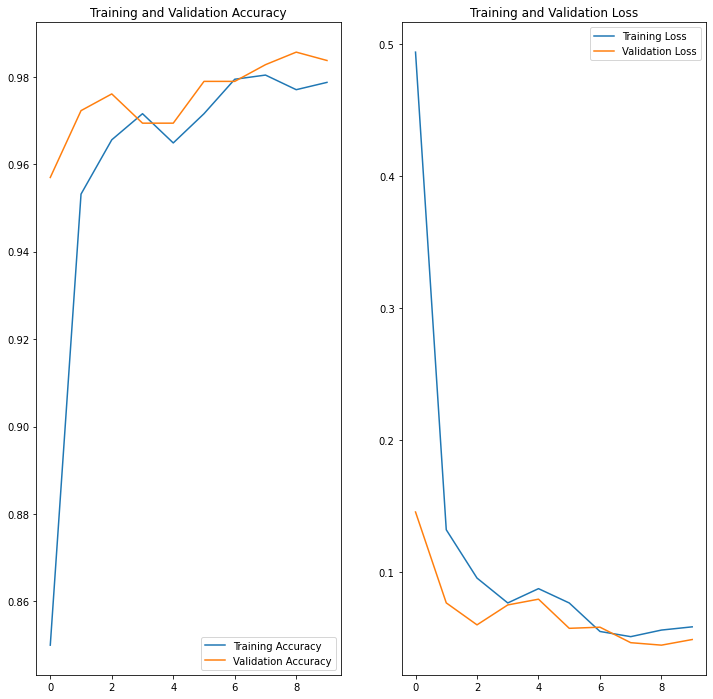

In [33]:
acc = model_cnn.history['accuracy']
val_acc = model_cnn.history['val_accuracy']

loss = model_cnn.history['loss']
val_loss = model_cnn.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

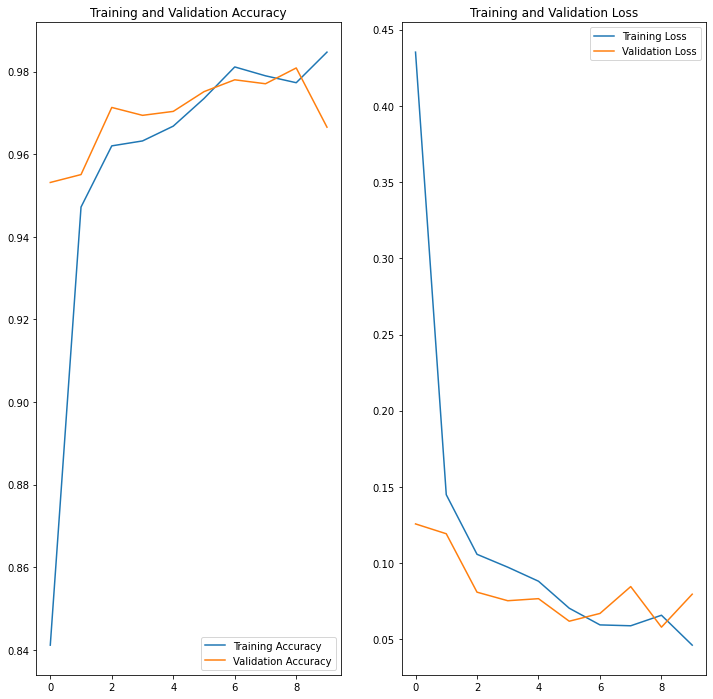

##1-2) Random Rotation

In [ ]:
def build_model(dt_train): # with no drop out


  model = Sequential([
    # It is also possible to normalize layer in the building block of the model                   
    #layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # The first convolutional layer can typically have a large kernel, usually with a stride of 2
    #layers.Conv2D(filters=16, kernel_size=5, strides=(2,), padding='same', activation='relu', input_shape=(img_height, img_width, 3)), # RGB

    layers.experimental.preprocessing.RandomRotation(0.1, input_shape=(img_height, 
                                                              img_width,
                                                              1)),
    
    layers.Conv2D(filters=16, kernel_size=5, strides=2, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    #layers.Dropout(.5), # To reduce overfitting
    layers.Dense(64, activation='relu'),
    #layers.Dropout(.5),
    layers.Dense(num_class, activation='softmax')
  ])

  # Compile the model
  model.compile(
      optimizer='adam',
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])
  
  return model

In [34]:
dt_augms = ['randomrotation']
model = build_model(dt_train, dt_augms)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_rotation (RandomRotat (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 11, 11, 64)       

In [35]:
epochs=10

model_cnn = model.fit(
  dt_train,
  validation_data=dt_val,
  epochs=epochs
)

Epoch 1/10
131/131 [==============================] - 2s 10ms/step - loss: 1.2700 - accuracy: 0.7800 - val_loss: 0.2113 - val_accuracy: 0.9283
Epoch 2/10
131/131 [==============================] - 1s 8ms/step - loss: 0.2117 - accuracy: 0.9188 - val_loss: 0.1531 - val_accuracy: 0.9493
Epoch 3/10
131/131 [==============================] - 1s 8ms/step - loss: 0.2039 - accuracy: 0.9239 - val_loss: 0.1647 - val_accuracy: 0.9331
Epoch 4/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1691 - accuracy: 0.9400 - val_loss: 0.1245 - val_accuracy: 0.9589
Epoch 5/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1494 - accuracy: 0.9429 - val_loss: 0.1293 - val_accuracy: 0.9532
Epoch 6/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1458 - accuracy: 0.9438 - val_loss: 0.0971 - val_accuracy: 0.9694
Epoch 7/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1192 - accuracy: 0.9554 - val_loss: 0.0951 - val_accuracy: 0.9637
Epoch

131/131 [==============================] - 1s 9ms/step - loss: 0.0976 - accuracy: 0.9645 - val_loss: 0.0594 - val_accuracy: 0.9818

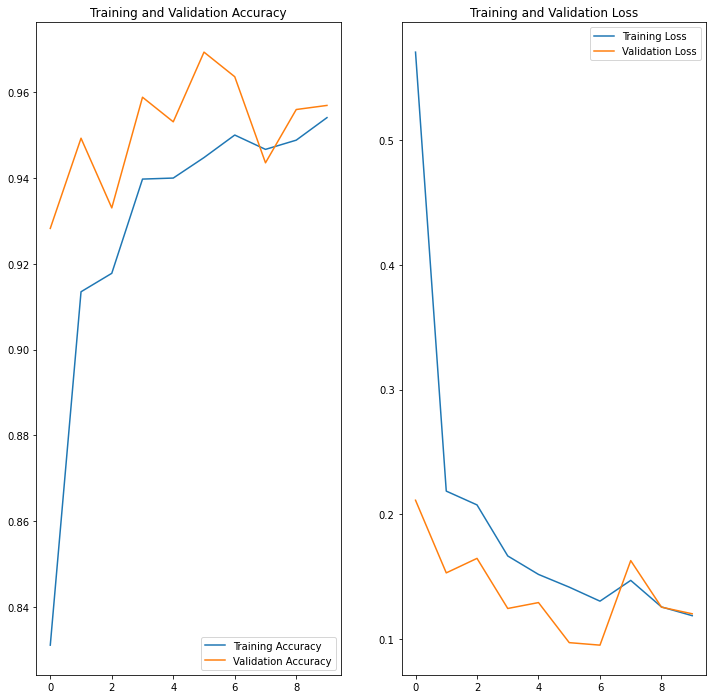

In [36]:
acc = model_cnn.history['accuracy']
val_acc = model_cnn.history['val_accuracy']

loss = model_cnn.history['loss']
val_loss = model_cnn.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

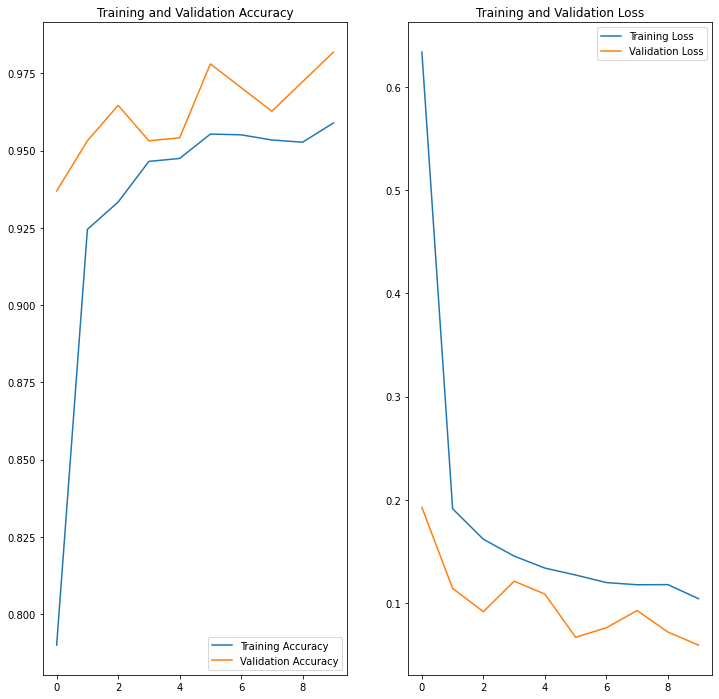

##1-3) Random Zoom 

In [ ]:
def build_model(dt_train): # with no drop out


  model = Sequential([
    # It is also possible to normalize layer in the building block of the model                   
    #layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # The first convolutional layer can typically have a large kernel, usually with a stride of 2
    #layers.Conv2D(filters=16, kernel_size=5, strides=(2,), padding='same', activation='relu', input_shape=(img_height, img_width, 3)), # RGB

    layers.experimental.preprocessing.RandomZoom(0.1, input_shape=(img_height, 
                                                              img_width,
                                                              1)),
    
    layers.Conv2D(filters=16, kernel_size=5, strides=2, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    #layers.Dropout(.5), # To reduce overfitting
    layers.Dense(64, activation='relu'),
    #layers.Dropout(.5),
    layers.Dense(num_class, activation='softmax')
  ])

  # Compile the model
  model.compile(
      optimizer='adam',
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])
  
  return model

In [ ]:
model = build_model(dt_train)
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_zoom_5 (RandomZoom)   (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 11, 11, 64)      

In [ ]:
epochs=10

model_cnn = model.fit(
  dt_train,
  validation_data=dt_val,
  epochs=epochs
)

Epoch 1/10
131/131 [==============================] - 2s 11ms/step - loss: 1.0526 - accuracy: 0.7539 - val_loss: 0.1008 - val_accuracy: 0.9627
Epoch 2/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1419 - accuracy: 0.9476 - val_loss: 0.0802 - val_accuracy: 0.9694
Epoch 3/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1015 - accuracy: 0.9638 - val_loss: 0.0732 - val_accuracy: 0.9713
Epoch 4/10
131/131 [==============================] - 1s 9ms/step - loss: 0.0931 - accuracy: 0.9633 - val_loss: 0.0475 - val_accuracy: 0.9799
Epoch 5/10
131/131 [==============================] - 1s 9ms/step - loss: 0.0729 - accuracy: 0.9734 - val_loss: 0.0528 - val_accuracy: 0.9790
Epoch 6/10
131/131 [==============================] - 1s 9ms/step - loss: 0.0782 - accuracy: 0.9690 - val_loss: 0.0573 - val_accuracy: 0.9751
Epoch 7/10
131/131 [==============================] - 1s 9ms/step - loss: 0.0743 - accuracy: 0.9723 - val_loss: 0.0595 - val_accuracy: 0.9799
Epoch

Epoch 4/10
131/131 [==============================] - 1s 9ms/step - loss: 0.0931 - accuracy: 0.9633 - val_loss: 0.0475 - val_accuracy: 0.9799

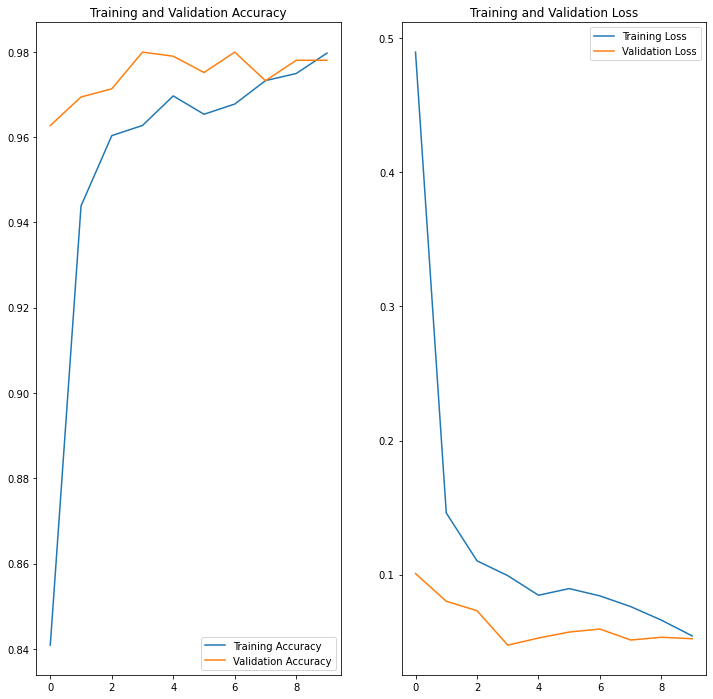

In [ ]:
acc = model_cnn.history['accuracy']
val_acc = model_cnn.history['val_accuracy']

loss = model_cnn.history['loss']
val_loss = model_cnn.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##2. Applying two augmentations at a time: 1) Flip & Rotation, 2) Flip & Zoom, 3) Rotation & Zoom

##2-1) Random Flip & Random Rotation

In [ ]:
def build_model(dt_train): # with no drop out


  model = Sequential([
    # It is also possible to normalize layer in the building block of the model                   
    #layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # The first convolutional layer can typically have a large kernel, usually with a stride of 2
    #layers.Conv2D(filters=16, kernel_size=5, strides=(2,), padding='same', activation='relu', input_shape=(img_height, img_width, 3)), # RGB
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              1)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    
    layers.Conv2D(filters=16, kernel_size=5, strides=2, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    #layers.Dropout(.5), # To reduce overfitting
    layers.Dense(64, activation='relu'),
    #layers.Dropout(.5),
    layers.Dense(num_class, activation='softmax')
  ])

  # Compile the model
  model.compile(
      optimizer='adam',
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])
  
  return model

In [ ]:
model = build_model(dt_train)
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_6 (RandomFlip)   (None, 180, 180, 1)       0         
_________________________________________________________________
random_rotation_6 (RandomRot (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 22, 22, 64)      

In [ ]:
epochs=10

model_cnn = model.fit(
  dt_train,
  validation_data=dt_val,
  epochs=epochs
)

Epoch 1/10
131/131 [==============================] - 2s 11ms/step - loss: 1.4779 - accuracy: 0.7029 - val_loss: 0.3607 - val_accuracy: 0.8088
Epoch 2/10
131/131 [==============================] - 1s 9ms/step - loss: 0.4374 - accuracy: 0.8049 - val_loss: 0.1790 - val_accuracy: 0.9264
Epoch 3/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1998 - accuracy: 0.9252 - val_loss: 0.1113 - val_accuracy: 0.9551
Epoch 4/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1661 - accuracy: 0.9372 - val_loss: 0.0863 - val_accuracy: 0.9665
Epoch 5/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1540 - accuracy: 0.9453 - val_loss: 0.0781 - val_accuracy: 0.9713
Epoch 6/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1374 - accuracy: 0.9479 - val_loss: 0.1296 - val_accuracy: 0.9436
Epoch 7/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1312 - accuracy: 0.9541 - val_loss: 0.0818 - val_accuracy: 0.9675
Epoch

Epoch 8/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1295 - accuracy: 0.9530 - val_loss: 0.0776 - val_accuracy: 0.9751

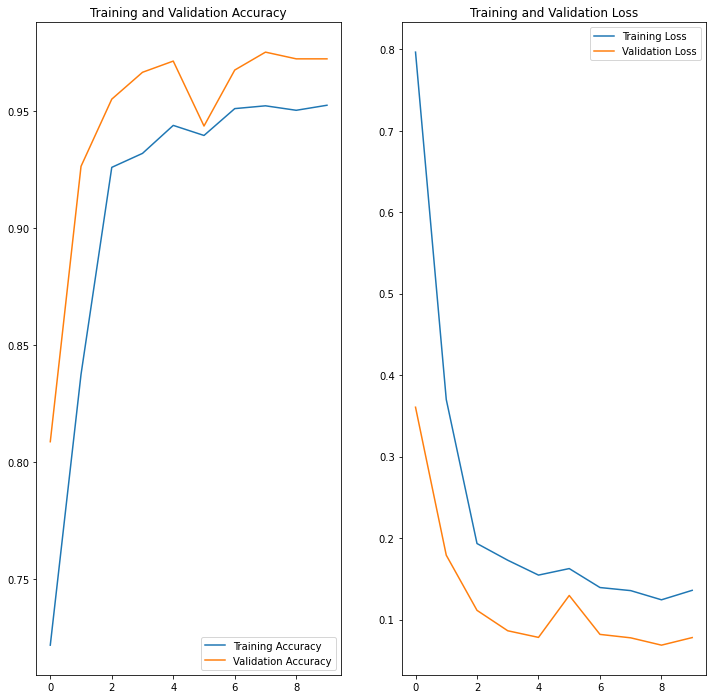

In [ ]:
acc = model_cnn.history['accuracy']
val_acc = model_cnn.history['val_accuracy']

loss = model_cnn.history['loss']
val_loss = model_cnn.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##2-2) Random Flip & Random Zoom

In [ ]:
def build_model(dt_train): # with no drop out


  model = Sequential([
    # It is also possible to normalize layer in the building block of the model                   
    #layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # The first convolutional layer can typically have a large kernel, usually with a stride of 2
    #layers.Conv2D(filters=16, kernel_size=5, strides=(2,), padding='same', activation='relu', input_shape=(img_height, img_width, 3)), # RGB
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              1)),
    layers.experimental.preprocessing.RandomZoom(0.1),
    
    layers.Conv2D(filters=16, kernel_size=5, strides=2, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    #layers.Dropout(.5), # To reduce overfitting
    layers.Dense(64, activation='relu'),
    #layers.Dropout(.5),
    layers.Dense(num_class, activation='softmax')
  ])

  # Compile the model
  model.compile(
      optimizer='adam',
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])
  
  return model

In [ ]:
model = build_model(dt_train)
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_7 (RandomFlip)   (None, 180, 180, 1)       0         
_________________________________________________________________
random_zoom_6 (RandomZoom)   (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 22, 22, 64)      

In [ ]:
epochs=10

model_cnn = model.fit(
  dt_train,
  validation_data=dt_val,
  epochs=epochs
)

Epoch 1/10
131/131 [==============================] - 2s 13ms/step - loss: 1.4137 - accuracy: 0.7181 - val_loss: 0.1975 - val_accuracy: 0.9207
Epoch 2/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1991 - accuracy: 0.9199 - val_loss: 0.0908 - val_accuracy: 0.9665
Epoch 3/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1286 - accuracy: 0.9530 - val_loss: 0.0777 - val_accuracy: 0.9694
Epoch 4/10
131/131 [==============================] - 1s 9ms/step - loss: 0.0962 - accuracy: 0.9661 - val_loss: 0.0856 - val_accuracy: 0.9704
Epoch 5/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1148 - accuracy: 0.9563 - val_loss: 0.0632 - val_accuracy: 0.9761
Epoch 6/10
131/131 [==============================] - 1s 9ms/step - loss: 0.0994 - accuracy: 0.9623 - val_loss: 0.0663 - val_accuracy: 0.9713
Epoch 7/10
131/131 [==============================] - 1s 9ms/step - loss: 0.0863 - accuracy: 0.9675 - val_loss: 0.0567 - val_accuracy: 0.9732
Epoch

Epoch 10/10
131/131 [==============================] - 1s 9ms/step - loss: 0.0823 - accuracy: 0.9657 - val_loss: 0.0551 - val_accuracy: 0.9790

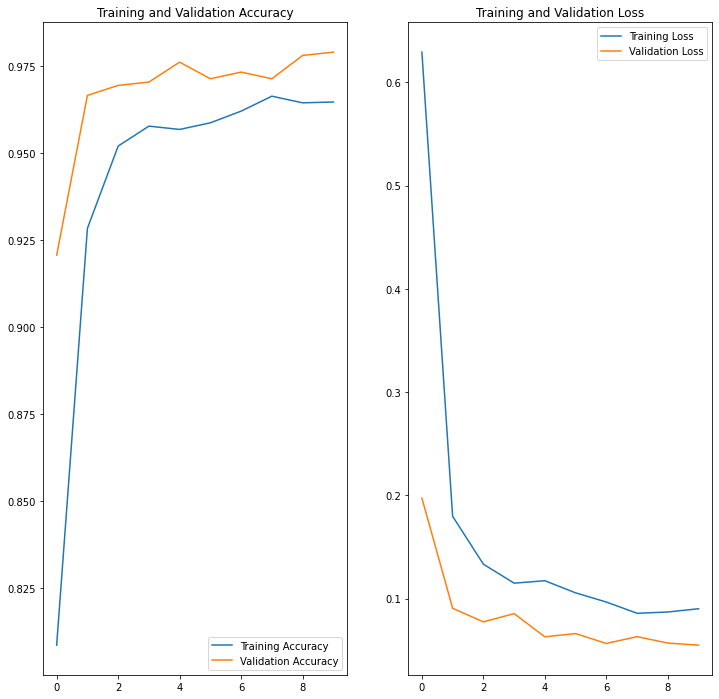

In [ ]:
acc = model_cnn.history['accuracy']
val_acc = model_cnn.history['val_accuracy']

loss = model_cnn.history['loss']
val_loss = model_cnn.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##2-3) Random Rotation & Zoom

In [ ]:
def build_model(dt_train): # with no drop out


  model = Sequential([
    # It is also possible to normalize layer in the building block of the model                   
    #layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # The first convolutional layer can typically have a large kernel, usually with a stride of 2
    #layers.Conv2D(filters=16, kernel_size=5, strides=(2,), padding='same', activation='relu', input_shape=(img_height, img_width, 3)), # RGB

    layers.experimental.preprocessing.RandomRotation(0.1, input_shape=(img_height, 
                                                              img_width,
                                                              1)),
    layers.experimental.preprocessing.RandomZoom(0.1),
    
    layers.Conv2D(filters=16, kernel_size=5, strides=2, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    #layers.Dropout(.5), # To reduce overfitting
    layers.Dense(64, activation='relu'),
    #layers.Dropout(.5),
    layers.Dense(num_class, activation='softmax')
  ])

  # Compile the model
  model.compile(
      optimizer='adam',
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])
  
  return model

In [ ]:
model = build_model(dt_train)
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_rotation_7 (RandomRot (None, 180, 180, 1)       0         
_________________________________________________________________
random_zoom_7 (RandomZoom)   (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 22, 22, 64)      

In [ ]:
epochs=10

model_cnn = model.fit(
  dt_train,
  validation_data=dt_val,
  epochs=epochs
)

Epoch 1/10
131/131 [==============================] - 2s 12ms/step - loss: 2.3286 - accuracy: 0.6875 - val_loss: 0.2153 - val_accuracy: 0.9101
Epoch 2/10
131/131 [==============================] - 1s 9ms/step - loss: 0.2758 - accuracy: 0.8827 - val_loss: 0.1599 - val_accuracy: 0.9331
Epoch 3/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1962 - accuracy: 0.9198 - val_loss: 0.1274 - val_accuracy: 0.9455
Epoch 4/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1788 - accuracy: 0.9373 - val_loss: 0.1136 - val_accuracy: 0.9579
Epoch 5/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1721 - accuracy: 0.9358 - val_loss: 0.1062 - val_accuracy: 0.9608
Epoch 6/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1478 - accuracy: 0.9455 - val_loss: 0.1231 - val_accuracy: 0.9522
Epoch 7/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1562 - accuracy: 0.9322 - val_loss: 0.1150 - val_accuracy: 0.9560
Epoch

Epoch 9/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1201 - accuracy: 0.9590 - val_loss: 0.0840 - val_accuracy: 0.9713

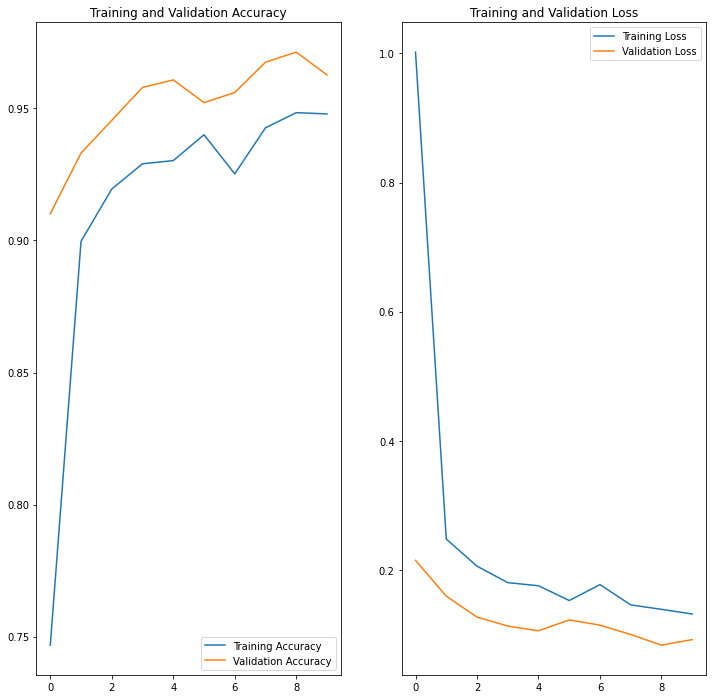

In [ ]:
acc = model_cnn.history['accuracy']
val_acc = model_cnn.history['val_accuracy']

loss = model_cnn.history['loss']
val_loss = model_cnn.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##3. Applying all three augmentations at the same time: Flip, Rotation & Zoom

In [ ]:
def build_model(dt_train): # with drop out


  model = Sequential([
    # It is also possible to normalize layer in the building block of the model                   
    #layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # The first convolutional layer can typically have a large kernel, usually with a stride of 2
    #layers.Conv2D(filters=16, kernel_size=5, strides=(2,), padding='same', activation='relu', input_shape=(img_height, img_width, 3)), # RGB
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              1)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    
    layers.Conv2D(filters=16, kernel_size=5, strides=2, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    #layers.Dropout(.5), # To reduce overfitting
    layers.Dense(64, activation='relu'),
    #layers.Dropout(.5),
    layers.Dense(num_class, activation='softmax')
  ])

  # Compile the model
  model.compile(
      optimizer='adam',
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])
  
  return model

In [ ]:
model = build_model(dt_train)
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_8 (RandomFlip)   (None, 180, 180, 1)       0         
_________________________________________________________________
random_rotation_8 (RandomRot (None, 180, 180, 1)       0         
_________________________________________________________________
random_zoom_8 (RandomZoom)   (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 22, 22, 32)      

In [ ]:
epochs=10

model_cnn = model.fit(
  dt_train,
  validation_data=dt_val,
  epochs=epochs
)

Epoch 1/10
131/131 [==============================] - 2s 12ms/step - loss: 2.1288 - accuracy: 0.6866 - val_loss: 0.1844 - val_accuracy: 0.9264
Epoch 2/10
131/131 [==============================] - 1s 10ms/step - loss: 0.2424 - accuracy: 0.9020 - val_loss: 0.1811 - val_accuracy: 0.9283
Epoch 3/10
131/131 [==============================] - 1s 10ms/step - loss: 0.1816 - accuracy: 0.9215 - val_loss: 0.1050 - val_accuracy: 0.9579
Epoch 4/10
131/131 [==============================] - 1s 10ms/step - loss: 0.1596 - accuracy: 0.9393 - val_loss: 0.1000 - val_accuracy: 0.9627
Epoch 5/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1461 - accuracy: 0.9454 - val_loss: 0.1595 - val_accuracy: 0.9398
Epoch 6/10
131/131 [==============================] - 1s 10ms/step - loss: 0.1582 - accuracy: 0.9310 - val_loss: 0.1039 - val_accuracy: 0.9637
Epoch 7/10
131/131 [==============================] - 1s 10ms/step - loss: 0.1372 - accuracy: 0.9526 - val_loss: 0.0823 - val_accuracy: 0.9646


Epoch 9/10
131/131 [==============================] - 1s 10ms/step - loss: 0.1364 - accuracy: 0.9469 - val_loss: 0.0842 - val_accuracy: 0.9723

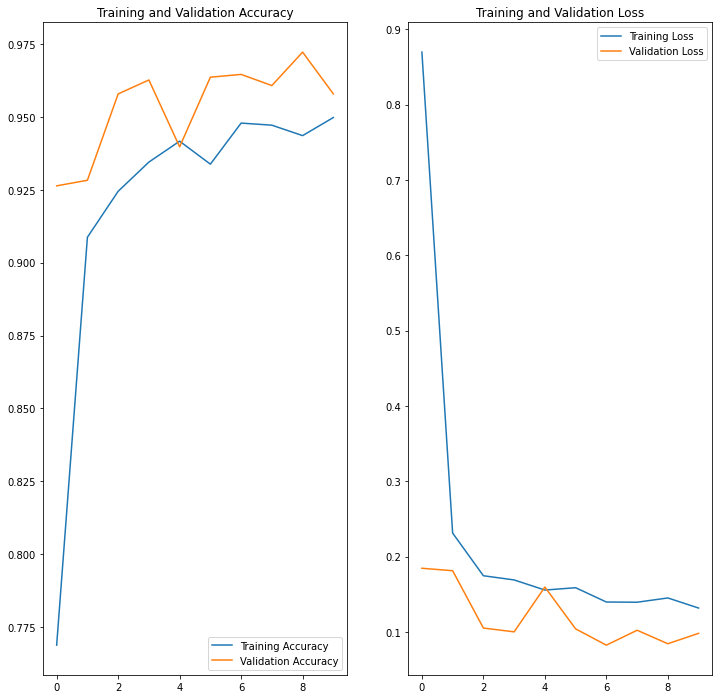

In [ ]:
acc = model_cnn.history['accuracy']
val_acc = model_cnn.history['val_accuracy']

loss = model_cnn.history['loss']
val_loss = model_cnn.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##4. Difference between applying DROP OUT and no DROP OUT (with Random Rotation)

In [ ]:
def build_model(dt_train): # with no drop out


  model = Sequential([
    # It is also possible to normalize layer in the building block of the model                   
    #layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # The first convolutional layer can typically have a large kernel, usually with a stride of 2
    #layers.Conv2D(filters=16, kernel_size=5, strides=(2,), padding='same', activation='relu', input_shape=(img_height, img_width, 3)), # RGB

    layers.experimental.preprocessing.RandomRotation(0.1, input_shape=(img_height, 
                                                              img_width,
                                                              1)),
    
    layers.Conv2D(filters=16, kernel_size=5, strides=2, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(.5), # To reduce overfitting
    layers.Dense(64, activation='relu'),
    layers.Dropout(.5),
    layers.Dense(num_class, activation='softmax')
  ])

  # Compile the model
  model.compile(
      optimizer='adam',
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])
  
  return model

In [ ]:
model = build_model(dt_train)
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_rotation_9 (RandomRot (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_86 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_87 (MaxPooling (None, 11, 11, 64)      

In [ ]:
epochs=10

model_cnn = model.fit(
  dt_train,
  validation_data=dt_val,
  epochs=epochs
)

Epoch 1/10
131/131 [==============================] - 2s 11ms/step - loss: 1.4766 - accuracy: 0.6767 - val_loss: 0.5038 - val_accuracy: 0.7744
Epoch 2/10
131/131 [==============================] - 1s 9ms/step - loss: 0.5421 - accuracy: 0.7440 - val_loss: 0.4347 - val_accuracy: 0.7868
Epoch 3/10
131/131 [==============================] - 1s 9ms/step - loss: 0.4580 - accuracy: 0.7740 - val_loss: 0.2261 - val_accuracy: 0.9168
Epoch 4/10
131/131 [==============================] - 1s 9ms/step - loss: 0.3293 - accuracy: 0.8522 - val_loss: 0.1705 - val_accuracy: 0.9426
Epoch 5/10
131/131 [==============================] - 1s 10ms/step - loss: 0.2372 - accuracy: 0.9021 - val_loss: 0.1689 - val_accuracy: 0.9216
Epoch 6/10
131/131 [==============================] - 1s 9ms/step - loss: 0.2297 - accuracy: 0.9015 - val_loss: 0.1351 - val_accuracy: 0.9455
Epoch 7/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1917 - accuracy: 0.9186 - val_loss: 0.1228 - val_accuracy: 0.9465
Epoc

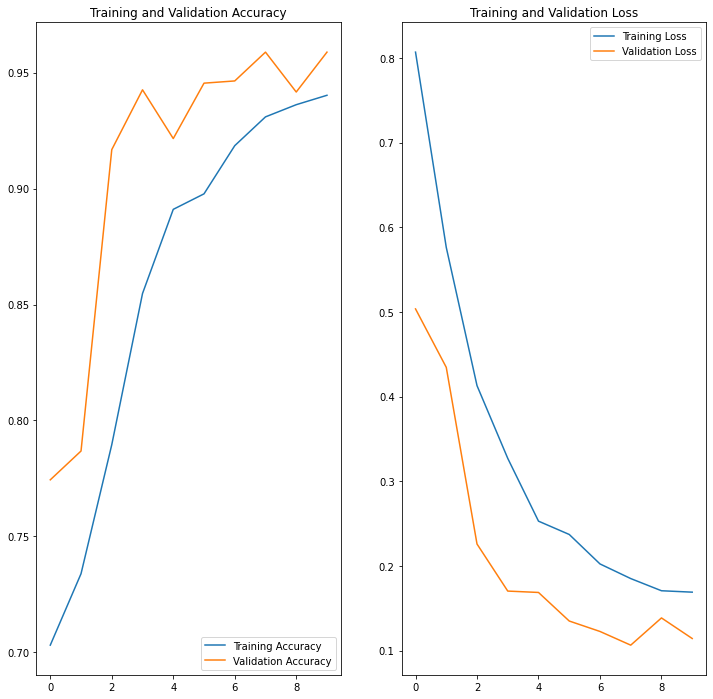

In [ ]:
acc = model_cnn.history['accuracy']
val_acc = model_cnn.history['val_accuracy']

loss = model_cnn.history['loss']
val_loss = model_cnn.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Build a model

## Building a model with DROP OUT and with no AUGMENTATION

In [ ]:
def build_model(dt_train):  # with drop out

  model = Sequential([
    # It is also possible to normalize layer in the building block of the model                   
    #layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # The first convolutional layer can typically have a large kernel, usually with a stride of 2
    #layers.Conv2D(filters=16, kernel_size=5, strides=(2,), padding='same', activation='relu', input_shape=(img_height, img_width, 3)), # RGB
    layers.Conv2D(filters=16, kernel_size=5, strides=2, padding='same', activation='relu', input_shape=(img_height, img_width, 1)),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(.5), # To reduce overfitting
    layers.Dense(64, activation='relu'),
    layers.Dropout(.5),
    layers.Dense(num_class, activation='softmax')
  ])

  # Compile the model
  model.compile(
      optimizer='adam',
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])
  
  return model

In [ ]:
model = build_model(dt_train)
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 11, 11, 128)      

In [ ]:
epochs=10

model_cnn = model.fit(
  dt_train,
  validation_data=dt_val,
  epochs=epochs
)

Epoch 1/10
131/131 [==============================] - 2s 11ms/step - loss: 1.5946 - accuracy: 0.6815 - val_loss: 0.2300 - val_accuracy: 0.9044
Epoch 2/10
131/131 [==============================] - 1s 9ms/step - loss: 0.2984 - accuracy: 0.8659 - val_loss: 0.0994 - val_accuracy: 0.9685
Epoch 3/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1792 - accuracy: 0.9337 - val_loss: 0.0617 - val_accuracy: 0.9818
Epoch 4/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1188 - accuracy: 0.9544 - val_loss: 0.0631 - val_accuracy: 0.9723
Epoch 5/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1020 - accuracy: 0.9601 - val_loss: 0.0909 - val_accuracy: 0.9675
Epoch 6/10
131/131 [==============================] - 1s 9ms/step - loss: 0.0881 - accuracy: 0.9666 - val_loss: 0.0721 - val_accuracy: 0.9694
Epoch 7/10
131/131 [==============================] - 1s 9ms/step - loss: 0.0768 - accuracy: 0.9749 - val_loss: 0.1075 - val_accuracy: 0.9598
Epoch

In [ ]:
acc = model_cnn.history['accuracy']
val_acc = model_cnn.history['val_accuracy']

loss = model_cnn.history['loss']
val_loss = model_cnn.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

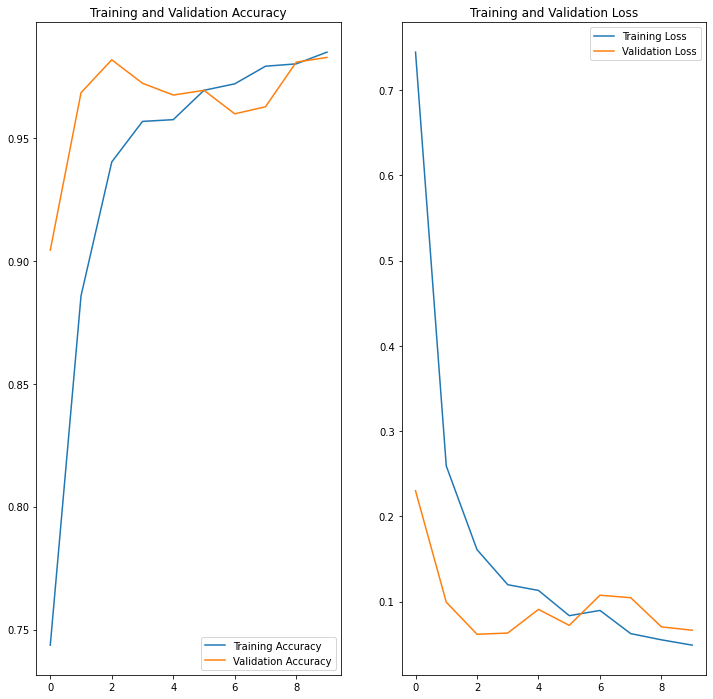

## Building a model with NO DROP OUT and with NO AUGEMENTATION

In [ ]:
def build_model(dt_train):  # with NO drop out

  model = Sequential([
    # It is also possible to normalize layer in the building block of the model                   
    #layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # The first convolutional layer can typically have a large kernel, usually with a stride of 2
    #layers.Conv2D(filters=16, kernel_size=5, strides=(2,), padding='same', activation='relu', input_shape=(img_height, img_width, 3)), # RGB
    layers.Conv2D(filters=16, kernel_size=5, strides=2, padding='same', activation='relu', input_shape=(img_height, img_width, 1)),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(.5), # To reduce overfitting
    layers.Dense(64, activation='relu'),
#    layers.Dropout(.5),
    layers.Dense(num_class, activation='softmax')
  ])

  # Compile the model
  model.compile(
      optimizer='adam',
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])
  
  return model

In [ ]:
model = build_model(dt_train)
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 11, 11, 128)      

# Train the model

In [ ]:
epochs=10

model_cnn = model.fit(
  dt_train,
  validation_data=dt_val,
  epochs=epochs
)

Epoch 1/10
131/131 [==============================] - 34s 243ms/step - loss: 0.9670 - accuracy: 0.7471 - val_loss: 0.2262 - val_accuracy: 0.9054
Epoch 2/10
131/131 [==============================] - 1s 9ms/step - loss: 0.2404 - accuracy: 0.8983 - val_loss: 0.1158 - val_accuracy: 0.9551
Epoch 3/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1313 - accuracy: 0.9506 - val_loss: 0.0579 - val_accuracy: 0.9809
Epoch 4/10
131/131 [==============================] - 1s 9ms/step - loss: 0.0866 - accuracy: 0.9678 - val_loss: 0.0853 - val_accuracy: 0.9637
Epoch 5/10
131/131 [==============================] - 1s 9ms/step - loss: 0.0624 - accuracy: 0.9745 - val_loss: 0.1623 - val_accuracy: 0.9379
Epoch 6/10
131/131 [==============================] - 1s 9ms/step - loss: 0.0757 - accuracy: 0.9711 - val_loss: 0.0710 - val_accuracy: 0.9751
Epoch 7/10
131/131 [==============================] - 1s 9ms/step - loss: 0.0653 - accuracy: 0.9789 - val_loss: 0.0776 - val_accuracy: 0.9656
Epo

# Visualize training results

In [ ]:
acc = model_cnn.history['accuracy']
val_acc = model_cnn.history['val_accuracy']

loss = model_cnn.history['loss']
val_loss = model_cnn.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

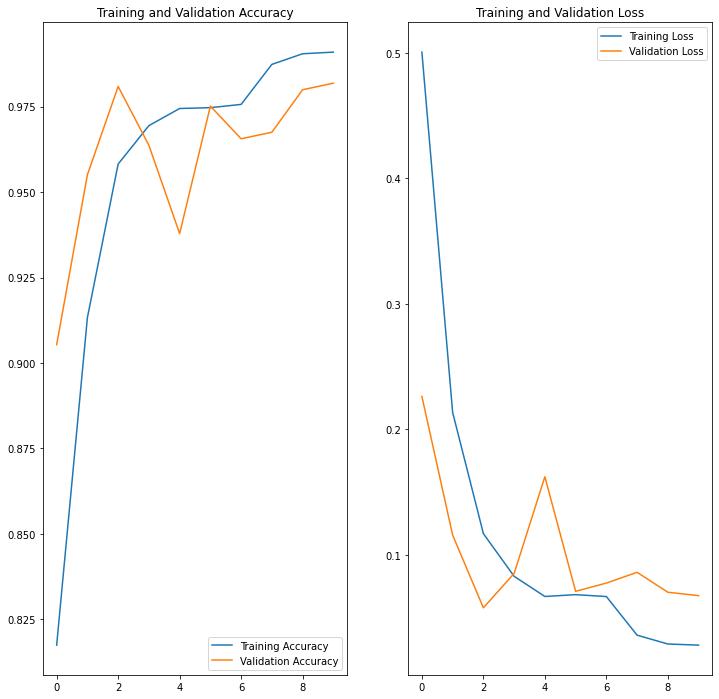

# Build a Model (Applied Data Augmentation)


## Building a model with DROP OUT and AUGMENTATION

In [ ]:
def build_model(dt_train): # with drop out


  model = Sequential([
    # It is also possible to normalize layer in the building block of the model                   
    #layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # The first convolutional layer can typically have a large kernel, usually with a stride of 2
    #layers.Conv2D(filters=16, kernel_size=5, strides=(2,), padding='same', activation='relu', input_shape=(img_height, img_width, 3)), # RGB
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              1)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    
    layers.Conv2D(filters=16, kernel_size=5, strides=2, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(.5), # To reduce overfitting
    layers.Dense(64, activation='relu'),
    layers.Dropout(.5),
    layers.Dense(num_class, activation='softmax')
  ])

  # Compile the model
  model.compile(
      optimizer='adam',
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])
  
  return model

In [ ]:
model = build_model(dt_train)
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_4 (RandomFlip)   (None, 180, 180, 1)       0         
_________________________________________________________________
random_rotation_4 (RandomRot (None, 180, 180, 1)       0         
_________________________________________________________________
random_zoom_4 (RandomZoom)   (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 22, 22, 32)       

In [ ]:
epochs=10

model_cnn = model.fit(
  dt_train,
  validation_data=dt_val,
  epochs=epochs
)

Epoch 1/10
131/131 [==============================] - 2s 12ms/step - loss: 1.4007 - accuracy: 0.6870 - val_loss: 0.4369 - val_accuracy: 0.7744
Epoch 2/10
131/131 [==============================] - 1s 10ms/step - loss: 0.5024 - accuracy: 0.7515 - val_loss: 0.3452 - val_accuracy: 0.8375
Epoch 3/10
131/131 [==============================] - 1s 10ms/step - loss: 0.3449 - accuracy: 0.8392 - val_loss: 0.1712 - val_accuracy: 0.9417
Epoch 4/10
131/131 [==============================] - 1s 10ms/step - loss: 0.2847 - accuracy: 0.8794 - val_loss: 0.1750 - val_accuracy: 0.9168
Epoch 5/10
131/131 [==============================] - 1s 10ms/step - loss: 0.2357 - accuracy: 0.9109 - val_loss: 0.1264 - val_accuracy: 0.9522
Epoch 6/10
131/131 [==============================] - 1s 10ms/step - loss: 0.2136 - accuracy: 0.9184 - val_loss: 0.1513 - val_accuracy: 0.9321
Epoch 7/10
131/131 [==============================] - 1s 10ms/step - loss: 0.2033 - accuracy: 0.9115 - val_loss: 0.0971 - val_accuracy: 0.9627

In [ ]:
acc = model_cnn.history['accuracy']
val_acc = model_cnn.history['val_accuracy']

loss = model_cnn.history['loss']
val_loss = model_cnn.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

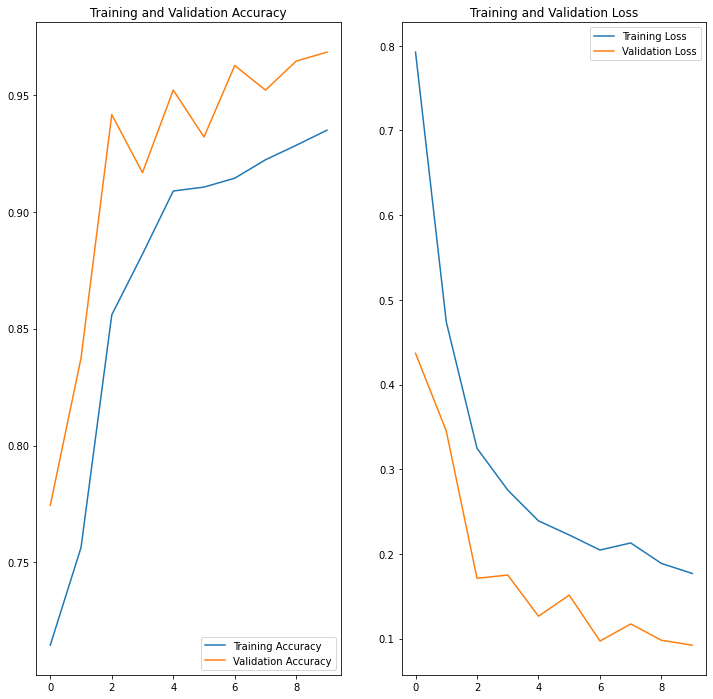

## Builidng a model with NO DROP OUT and with AUGMENTATION

In [ ]:
def build_model(dt_train): # with no drop out


  model = Sequential([
    # It is also possible to normalize layer in the building block of the model                   
    #layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # The first convolutional layer can typically have a large kernel, usually with a stride of 2
    #layers.Conv2D(filters=16, kernel_size=5, strides=(2,), padding='same', activation='relu', input_shape=(img_height, img_width, 3)), # RGB
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              1)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    
    layers.Conv2D(filters=16, kernel_size=5, strides=2, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(.5), # To reduce overfitting
    layers.Dense(64, activation='relu'),
    layers.Dropout(.5),
    layers.Dense(num_class, activation='softmax')
  ])

  # Compile the model
  model.compile(
      optimizer='adam',
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])
  
  return model

In [ ]:
model = build_model(dt_train)
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_3 (RandomFlip)   (None, 180, 180, 1)       0         
_________________________________________________________________
random_rotation_3 (RandomRot (None, 180, 180, 1)       0         
_________________________________________________________________
random_zoom_3 (RandomZoom)   (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 22, 22, 32)       

In [ ]:
epochs=10

model_cnn = model.fit(
  dt_train,
  validation_data=dt_val,
  epochs=epochs
)

Epoch 1/10
131/131 [==============================] - 2s 12ms/step - loss: 1.2867 - accuracy: 0.6791 - val_loss: 0.4506 - val_accuracy: 0.8633
Epoch 2/10
131/131 [==============================] - 1s 10ms/step - loss: 0.4768 - accuracy: 0.7719 - val_loss: 0.3254 - val_accuracy: 0.8327
Epoch 3/10
131/131 [==============================] - 1s 10ms/step - loss: 0.3170 - accuracy: 0.8628 - val_loss: 0.1938 - val_accuracy: 0.9340
Epoch 4/10
131/131 [==============================] - 1s 10ms/step - loss: 0.2713 - accuracy: 0.8868 - val_loss: 0.1197 - val_accuracy: 0.9532
Epoch 5/10
131/131 [==============================] - 1s 9ms/step - loss: 0.2313 - accuracy: 0.9136 - val_loss: 0.1085 - val_accuracy: 0.9579
Epoch 6/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1950 - accuracy: 0.9239 - val_loss: 0.1029 - val_accuracy: 0.9579
Epoch 7/10
131/131 [==============================] - 1s 10ms/step - loss: 0.1780 - accuracy: 0.9367 - val_loss: 0.0894 - val_accuracy: 0.9637
E

In [ ]:
acc = model_cnn.history['accuracy']
val_acc = model_cnn.history['val_accuracy']

loss = model_cnn.history['loss']
val_loss = model_cnn.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

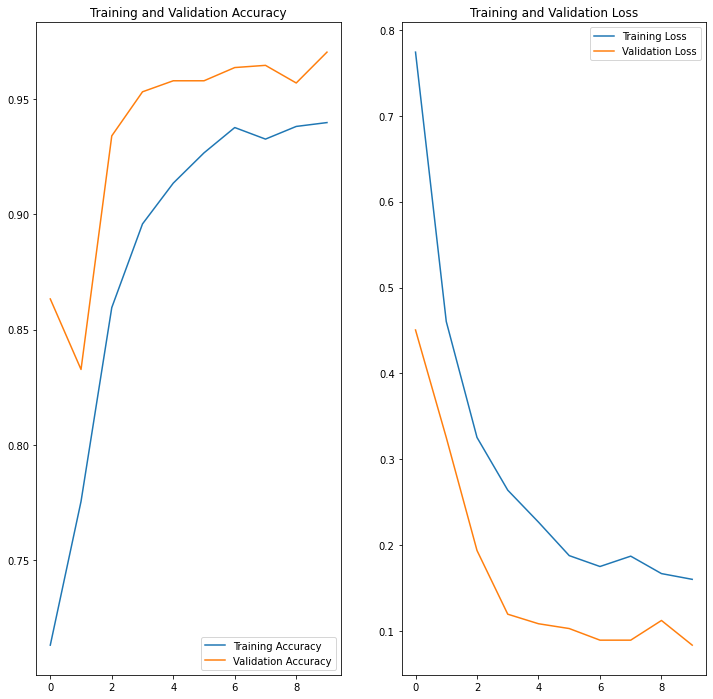